In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd ./drive/MyDrive/hopfield-network-for-paper/
!pip install -r requirements.txt

/content/drive/MyDrive/hopfield-network-for-paper


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from tqdm import tqdm
import seaborn as sns
sns.set_palette('hls', 10)

In [4]:
N = 32*32
P = 10
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_ITERATIONS = 25
# MASK一半的图片
NO_OF_BITS_TO_CHANGE = 512

In [5]:
def image_to_np(path):
    im = Image.open(path)
    im_np = np.asarray(im)
    try:
        im_np = im_np[:, :, 0]
    except IndexError:
        pass
    im_np = np.where(im_np<128, -1, 1)
    im_np = im_np.reshape(N)
    return im_np

In [6]:
PATH = './data/digits/'

In [7]:
# 读入所有的图片
epsilon = np.asarray([image_to_np(os.path.join(PATH, '0.jpg')),
                     image_to_np(os.path.join(PATH, '1.jpg')),
                     image_to_np(os.path.join(PATH, '2.jpg')),
                     image_to_np(os.path.join(PATH, '3.jpg')),
                     image_to_np(os.path.join(PATH, '4.jpg')),
                     image_to_np(os.path.join(PATH, '5.jpg')),
                     image_to_np(os.path.join(PATH, '6.jpg')),
                     image_to_np(os.path.join(PATH, '7.jpg')),
                     image_to_np(os.path.join(PATH, '8.jpg')),
                     image_to_np(os.path.join(PATH, '9.jpg'))])

In [8]:
epsilon.shape

(10, 1024)

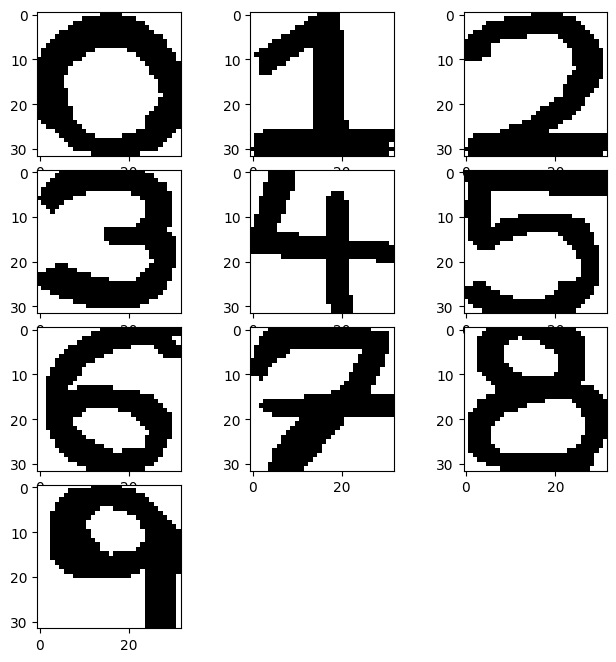

In [13]:
# 画出这些手写数字
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

[[-1  1  1 ... -1 -1  1]
 [ 1  1 -1 ...  1  1  1]
 [ 1 -1  1 ...  1 -1  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


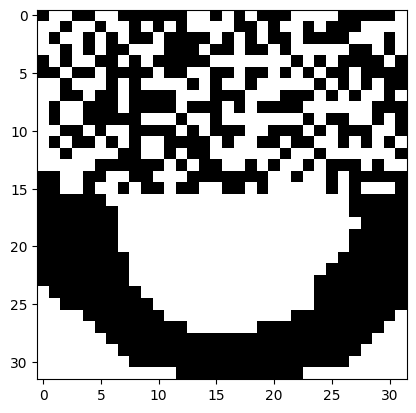

In [11]:
# 选择0进行随机掩码
import copy
test_array = copy.deepcopy(epsilon[0])
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test

print(test_array.reshape(N_sqrt, N_sqrt))
plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

In [12]:
epsilon.shape, test_array.shape

((10, 1024), (1024,))

In [14]:
# Hebbian算法
w = np.zeros((N, N))
h = np.zeros((N))
for i in tqdm(range(N)):
    for j in range(N):
        for p in range(P):
            w[i, j] += (epsilon[p, i]*epsilon[p, j]).sum()
        if i == j:
            w[i, j] = 0
w /= N
w.shape

100%|██████████| 1024/1024 [00:45<00:00, 22.64it/s]


(1024, 1024)

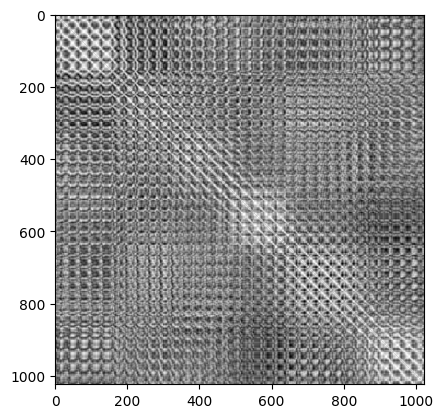

In [15]:
plt.imshow(w, cmap='gray')

100%|██████████| 25/25 [00:26<00:00,  1.04s/it]


array([276., 202., 179., 184., 195., 205., 210., 213., 214., 214., 214.,
       214., 214., 214., 214., 214., 214., 214., 214., 214., 214., 214.,
       214., 214., 214.])

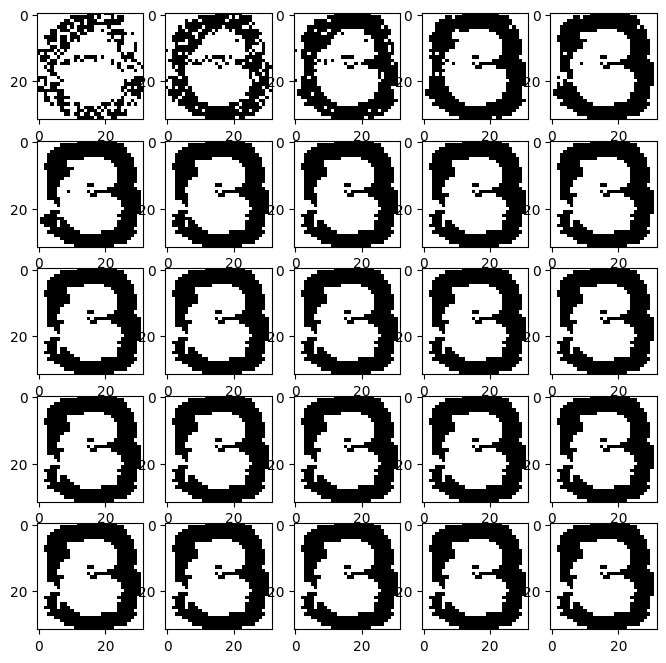

In [16]:
fig = plt.figure(figsize = (8, 8))
hamming_distance = np.zeros((NO_OF_ITERATIONS))
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array[j]
    test_array = np.where(h<0, -1, 1)
    hamming_distance[iteration] = ((epsilon[0] - test_array)!=0).sum()
    plt.subplot(5, 5,iteration+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')
hamming_distance

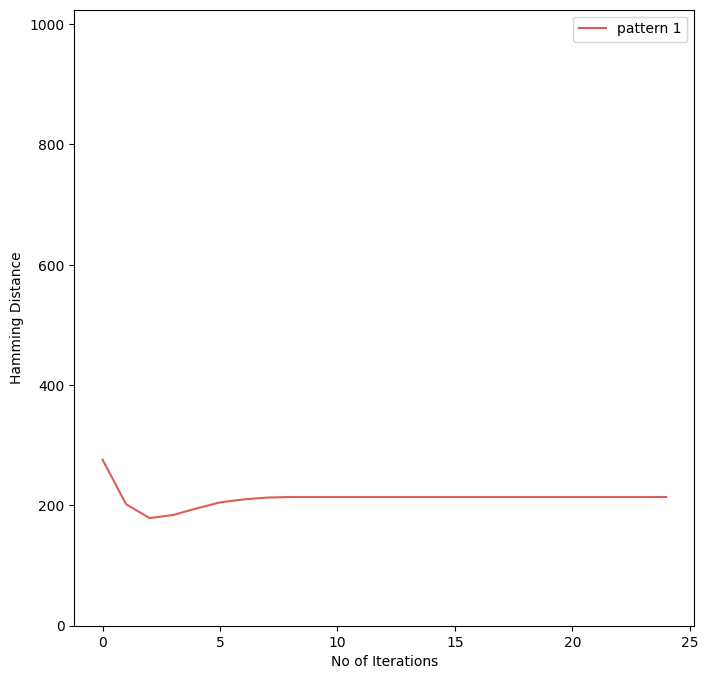

In [18]:
fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 1024])
plt.legend(['pattern 1'],  loc='best')
plt.show()